In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.fillna({'Sleep Disorder':'No Disorder'},inplace = True)

In [8]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [10]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [11]:
data['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [12]:
data.loc[data['BMI Category'] == ('Normal Weight' or 'Normal')].head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
30,31,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea
31,32,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Insomnia
32,33,Female,31,Nurse,7.9,8,75,4,Normal Weight,117/76,69,6800,No Disorder


In [13]:
data['BMI Category'] = data['BMI Category'].str.replace('Normal Weight','Underweight')


In [14]:
data['BMI Category'].value_counts()


BMI Category
Normal         195
Overweight     148
Underweight     21
Obese           10
Name: count, dtype: int64

In [15]:
data[['SYSTOLIC', 'DIASTOLIC']] = data['Blood Pressure'].str.split('/', expand=True)

data['SYSTOLIC'] = data['SYSTOLIC'].astype(float)
data['DIASTOLIC'] = data['DIASTOLIC'].astype(float)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [16]:
data = data.drop(['Person ID', 'Blood Pressure'], axis=1)
data.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Disorder,126.0,83.0
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Disorder,125.0,80.0
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  SYSTOLIC                 374 non-null    float64
 12  DIASTOLIC                374 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 38.1+ KB


In [18]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
No Disorder    219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

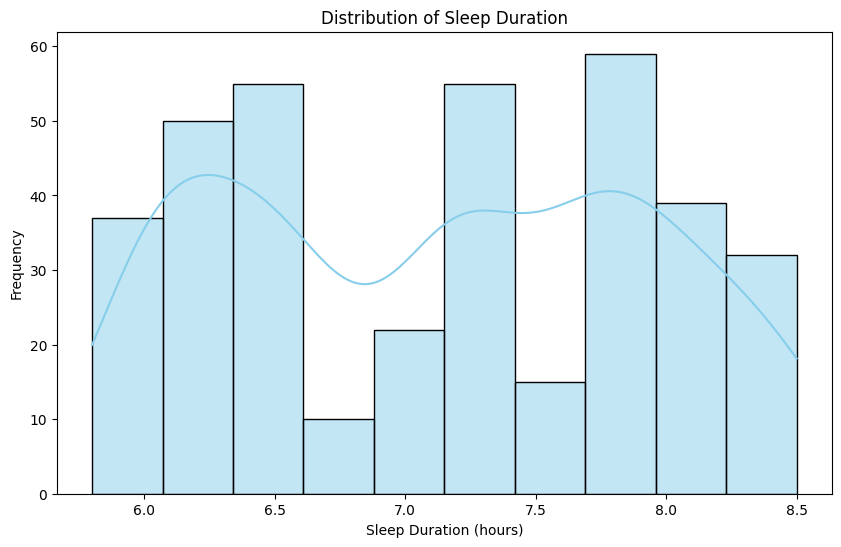

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Duration'], kde=True, color='skyblue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Sleep Disorder', ylabel='Age'>

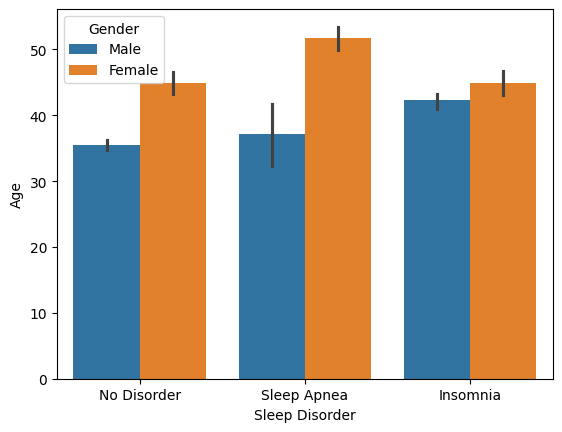

In [20]:
sns.barplot(data = data, y = 'Age', x = 'Sleep Disorder', hue = 'Gender')


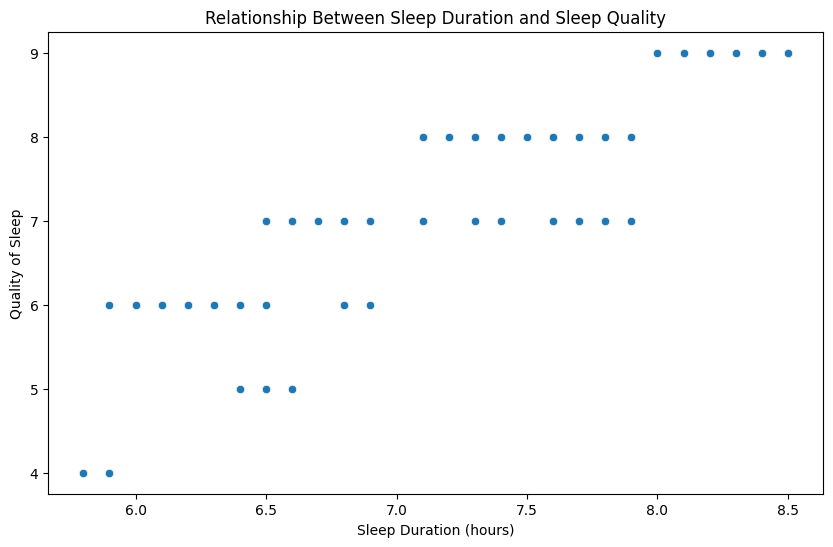

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data)
plt.title('Relationship Between Sleep Duration and Sleep Quality')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.show()

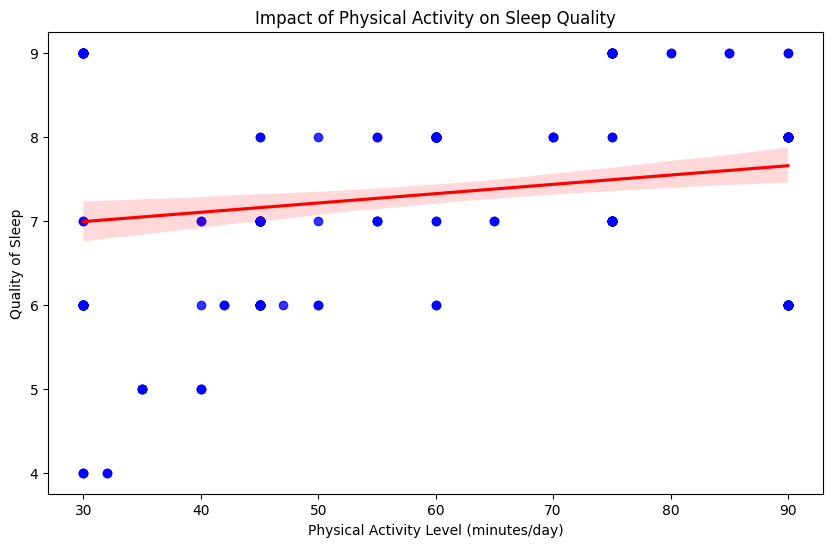

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Physical Activity Level', y='Quality of Sleep', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Impact of Physical Activity on Sleep Quality')
plt.xlabel('Physical Activity Level (minutes/day)')
plt.ylabel('Quality of Sleep')
plt.show()

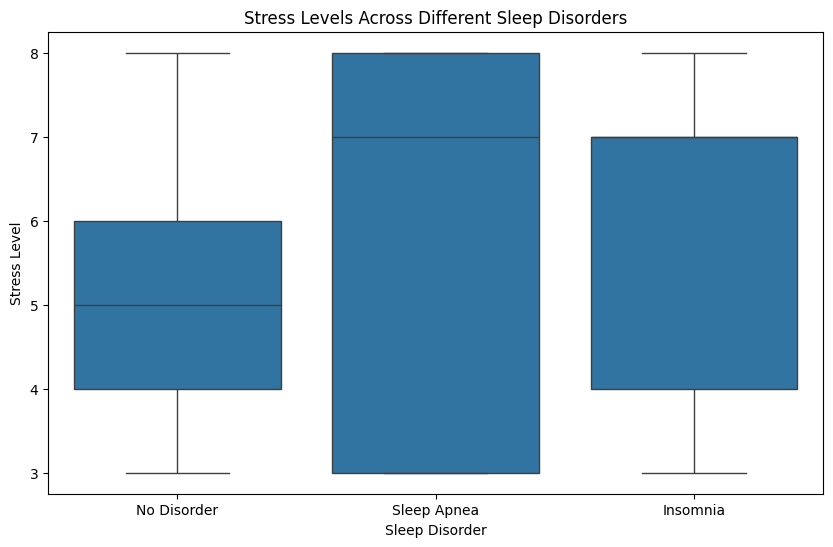

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=data)
plt.title('Stress Levels Across Different Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level')
plt.show()

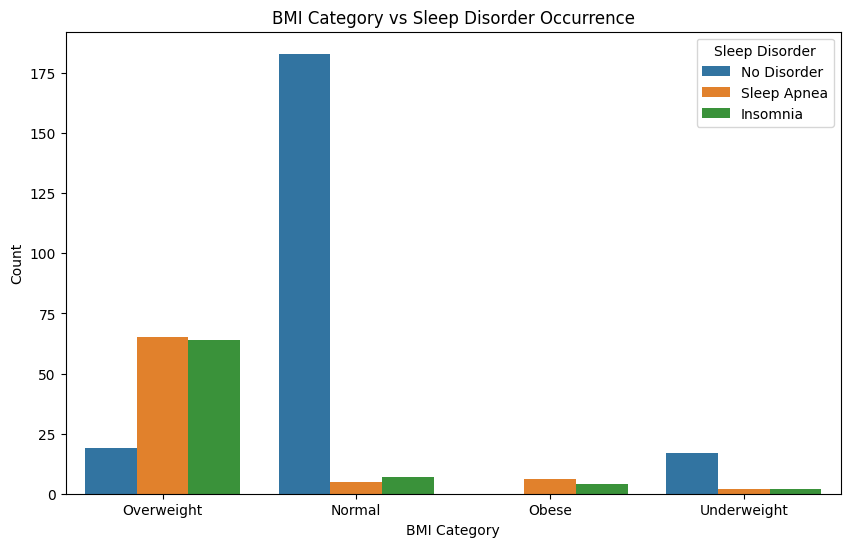

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI Category', hue='Sleep Disorder', data=data)
plt.title('BMI Category vs Sleep Disorder Occurrence')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

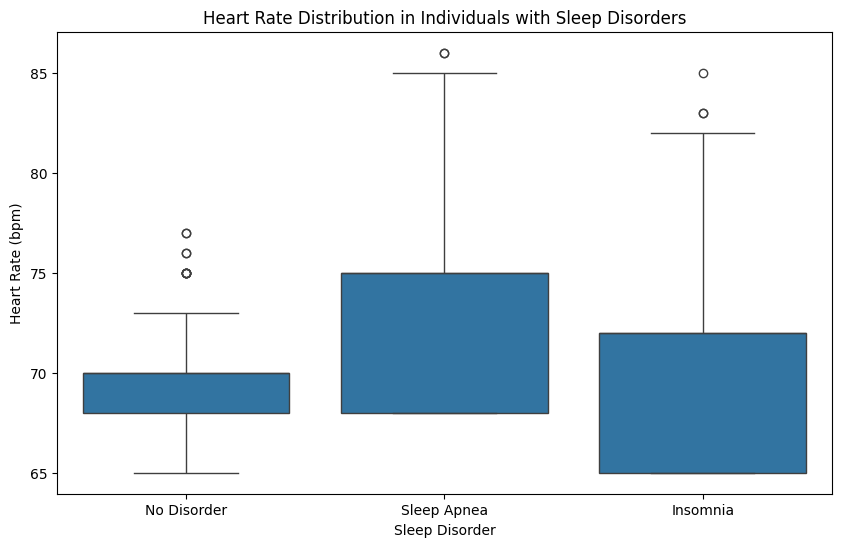

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=data)
plt.title('Heart Rate Distribution in Individuals with Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate (bpm)')
plt.show()

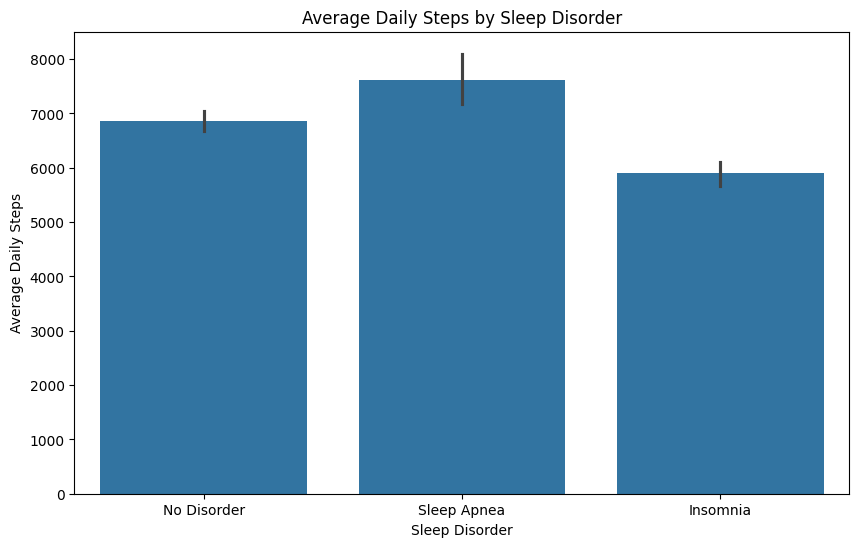

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Daily Steps', data=data, estimator='mean')
plt.title('Average Daily Steps by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Daily Steps')
plt.show()

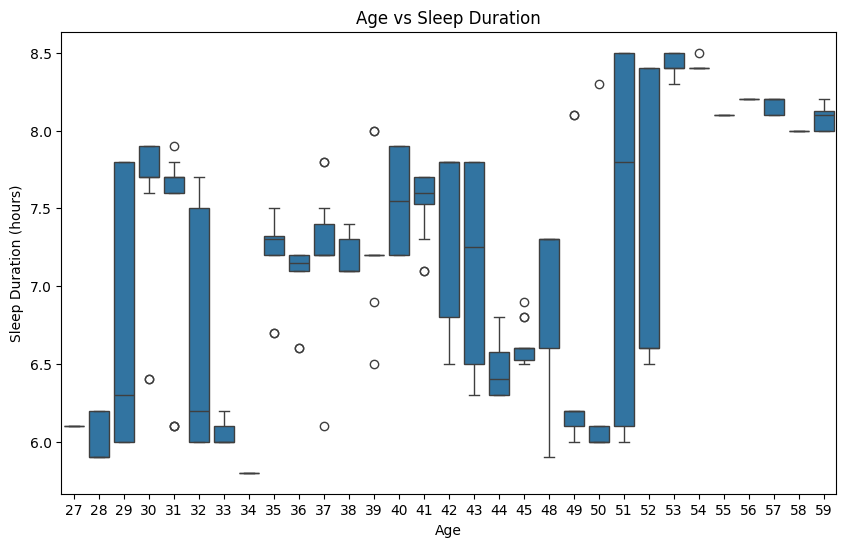

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Sleep Duration', data=data)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

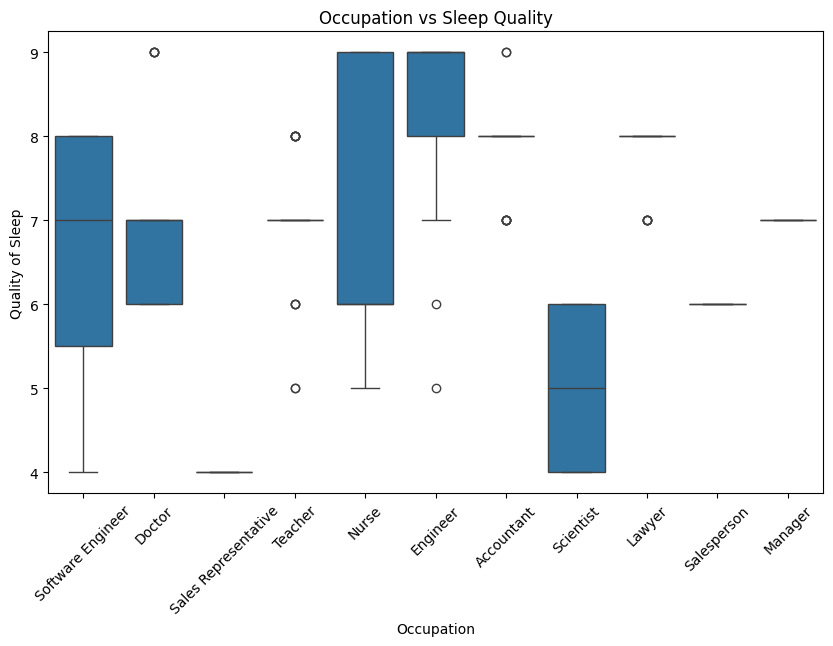

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=data)
plt.title('Occupation vs Sleep Quality')
plt.xlabel('Occupation')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

In [29]:
def detect_outliers(data):

  outliers = {}

  for column in data.select_dtypes(include = 'number').columns:

    Q1 = data[column].quantile(0.25)

    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1

    L = Q1 - 1.5 * IQR

    U = Q3 + 1.5 * IQR

    outliers[column] = data[(data[column] < L)|(data[column] > U)][column].to_list()

  return outliers

In [30]:
detect_outliers(data)

{'Age': [],
 'Sleep Duration': [],
 'Quality of Sleep': [],
 'Physical Activity Level': [],
 'Stress Level': [],
 'Heart Rate': [85, 85, 85, 82, 80, 80, 81, 81, 84, 84, 80, 83, 83, 86, 86],
 'Daily Steps': [],
 'SYSTOLIC': [],
 'DIASTOLIC': []}

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_column = ["Gender","Occupation","BMI Category","Sleep Disorder"]

for col in categorical_column:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  SYSTOLIC                 374 non-null    float64
 12  DIASTOLIC                374 non-null    float64
dtypes: float64(3), int32(4), int64(6)
memory usage: 32.3 KB


In [32]:
data.to_csv('dataset_baru.csv',index=False)

In [33]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [34]:
data['Gender'].value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

In [35]:
data['Occupation'].value_counts()

Occupation
5     73
1     71
2     63
3     47
10    40
0     37
7     32
9      4
8      4
6      2
4      1
Name: count, dtype: int64

In [36]:
data['BMI Category'].value_counts()

BMI Category
0    195
2    148
3     21
1     10
Name: count, dtype: int64

In [37]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

cat = ['Gender', 'Occupation', 'BMI Category']

num = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps','SYSTOLIC', 'DIASTOLIC']


preprocessor = ColumnTransformer(

    transformers=[

        ('num', StandardScaler(), num),

        ('cat', 'passthrough', cat)]
)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
y = data['Sleep Disorder']
X = data.drop(columns = ['Sleep Disorder'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [61]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

In [62]:
from sklearn.compose import ColumnTransformer

# ColumnTransformer example
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', 'passthrough', cat)
    ]
)

X_transformed = transformer.fit_transform(X_train)
print(transformer.get_feature_names_out())


['num__Age' 'num__Sleep Duration' 'num__Quality of Sleep'
 'num__Physical Activity Level' 'num__Stress Level' 'num__Heart Rate'
 'num__Daily Steps' 'num__SYSTOLIC' 'num__DIASTOLIC' 'cat__Gender'
 'cat__Occupation' 'cat__BMI Category']


In [63]:
from xgboost import XGBClassifier

pipeline = Pipeline([

    #('preprocessor', preprocessor),

    ('classifier',XGBClassifier())

])

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [69]:
dump(pipeline,'pipeline_model.pkl')

['pipeline_model.pkl']

In [64]:
param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.2,0.3,0.4],
    'max_depth': [4,5,6]

}

grid_search = GridSearchCV(XGBClassifier(),param_grid, cv=5,n_jobs = -1, scoring= 'accuracy')

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}

In [66]:
XGB_best = XGBClassifier(**grid_search.best_params_)
XGB_best.fit(X_train,y_train)
xgb_pred = XGB_best.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.95      0.98      0.97        43
           2       0.87      0.81      0.84        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability = True)

svm.fit(X_train,y_train)

svm_pred = svm.predict(X_test)

print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.98      0.97        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
print(classification_report(y_test,lgbm_pred))



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [44]:

# Cek shape X_train
print("Shape X_train:", X_train.shape)

# Cek panjang daftar kolom
print("Panjang num + cat:", len(num + cat))

# Output untuk debug
print("num + cat:", num + cat)


Shape X_train: (299, 12)
Panjang num + cat: 12
num + cat: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'SYSTOLIC', 'DIASTOLIC', 'Gender', 'Occupation', 'BMI Category']


In [45]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# Pastikan X_train dan X_test berbentuk DataFrame
X_train = pd.DataFrame(X_train, columns=num + cat)
X_test = pd.DataFrame(X_test, columns=num + cat)

# 1. Definisikan model
# CatBoost
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=5, verbose=0)

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# ELM (Menggunakan LogisticRegression sebagai proxy)
elm_model = LogisticRegression(max_iter=1000)  

# Meta-learner
meta_learner = LogisticRegression()

# 2. Definisikan StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('mlp', mlp_model),
        ('elm', elm_model)
    ],
    final_estimator=meta_learner
)

# 3. Integrasi dengan pipeline preprocessing
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing dari kode sebelumnya
    ('stacking_model', stacking_model)
])

# 4. Latih model
pipeline.fit(X_train, y_train)

# 5. Prediksi
y_pred = pipeline.predict(X_test)

# 6. Evaluasi
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8933333333333333


In [46]:
from sklearn.model_selection import GridSearchCV
# Tentukan parameter grid untuk setiap model
param_grid = {
    'catboost__iterations': [100, 200],
    'catboost__learning_rate': [0.01, 0.1],
    'catboost__depth': [6, 8],
    'mlp__hidden_layer_sizes': [(50,), (100,)],
    'mlp__activation': ['relu', 'tanh'],
    'logisticregression__C': [0.1, 1, 10],
}

# Tentukan model stacking
stacking_model = StackingClassifier(
    estimators=[
        ('catboost', CatBoostClassifier(silent=True)),
        ('mlp', MLPClassifier(max_iter=1000)),
        ('logisticregression', LogisticRegression())
    ],
    final_estimator=LogisticRegression()
)

# Buat GridSearchCV untuk pencarian grid
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Latih GridSearchCV
grid_search.fit(X_train, y_train)

# Lihat parameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'catboost__depth': 6, 'catboost__iterations': 100, 'catboost__learning_rate': 0.01, 'logisticregression__C': 0.1, 'mlp__activation': 'tanh', 'mlp__hidden_layer_sizes': (100,)}


In [47]:
# Prediksi dengan model terbaik
best_stacking_model = grid_search.best_estimator_
y_pred = best_stacking_model.predict(X_test)

# Evaluasi model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



In [48]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators = [('Stacking Model',best_stacking_model),('rf',rf_model),('svc',svm),('Lightgbm',lgbm)], voting = 'soft')

vc_model.fit(X_train,y_train)

vc_pred = vc_model.predict(X_test)

print(classification_report(vc_pred,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 299, number of used features: 12
[LightGBM] [Info] Start training from score -1.589570
[LightGBM] [Info] Start training from score -0.529960
[LightGBM] [Info] Start training from score -1.573309
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

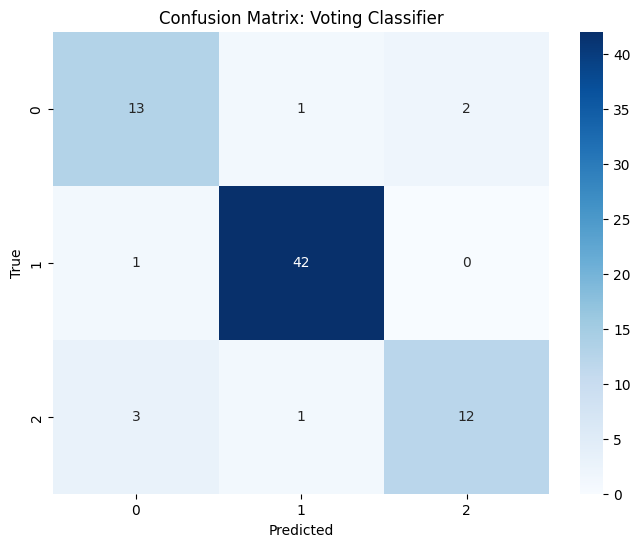


Model: LightGBM
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



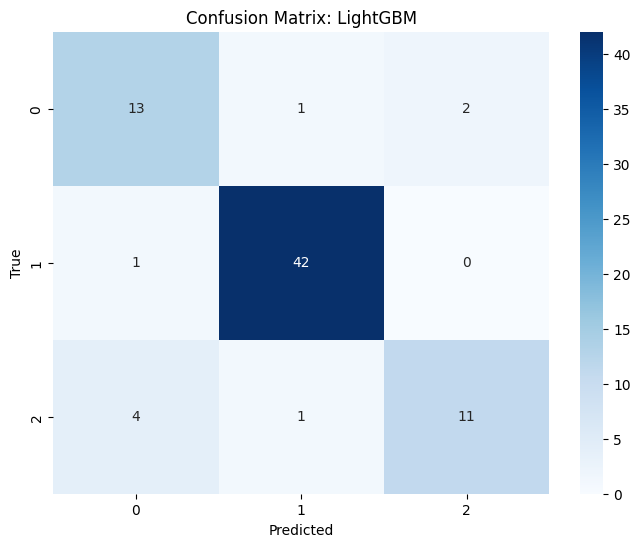


Model: Svm
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.95      0.98      0.97        43
           2       0.92      0.75      0.83        16

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



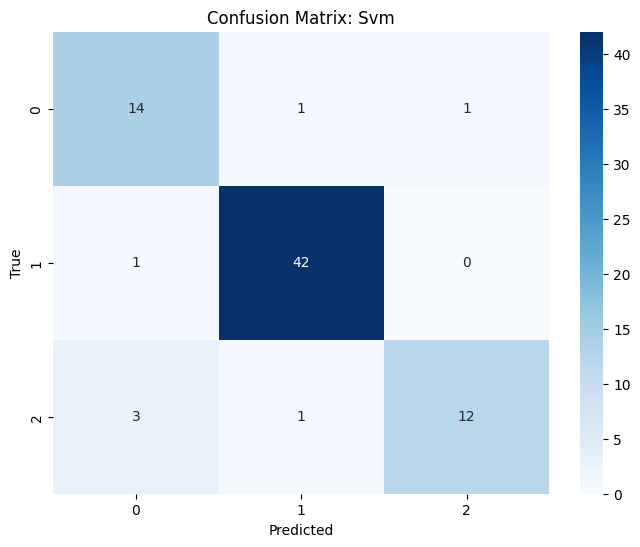


Model: CatBoostClassifier + MLP + ELM
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



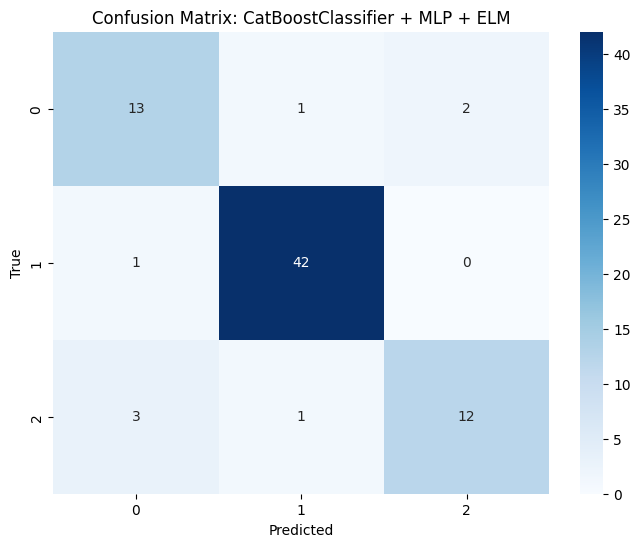


Summary of Model Performance:
                            Model  Accuracy
0               Voting Classifier  0.893333
1                        LightGBM  0.880000
2                             Svm  0.906667
3  CatBoostClassifier + MLP + ELM  0.893333


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

vc_model.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
svm.fit(X_train, y_train)
best_stacking_model.fit(X_train, y_train)

# List of pre-trained models and their names
models = [
    ('Voting Classifier', vc_model),
    ('LightGBM', lgbm),
    ('Svm', svm),
    ('CatBoostClassifier + MLP + ELM', best_stacking_model)
]

# DataFrame to store evaluation results
results = []

# Evaluate each model
for model_name, model in models:
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Classification Report
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    unique_labels = sorted(y_test.unique())  # Get the unique labels from y_test
    plot_confusion_matrix(y_test, y_pred, labels=unique_labels, model_name=model_name)
    
    # Add results to the table
    results.append({'Model': model_name, 'Accuracy': accuracy})

# Display results in a table
results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)

In [50]:
from joblib import dump
dump(svm,"svm_model.pkl")
dump(label_encoders,"label_encoders.pkl")


['label_encoders.pkl']

In [51]:
label_encoders["Gender"].classes_  # Should return array(['Female', 'Male'], dtype=object)


array(['Female', 'Male'], dtype=object)

In [52]:
dump(best_stacking_model,"catboost+ELM+MLP_model.pkl")

['catboost+ELM+MLP_model.pkl']

In [53]:
dump(lgbm,"lgbm_model.pkl")

['lgbm_model.pkl']

In [54]:
dump(rf_model,"rf_model.pkl")

['rf_model.pkl']

In [67]:
dump(XGB_best,"XGB_model.pkl")

['XGB_model.pkl']